In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

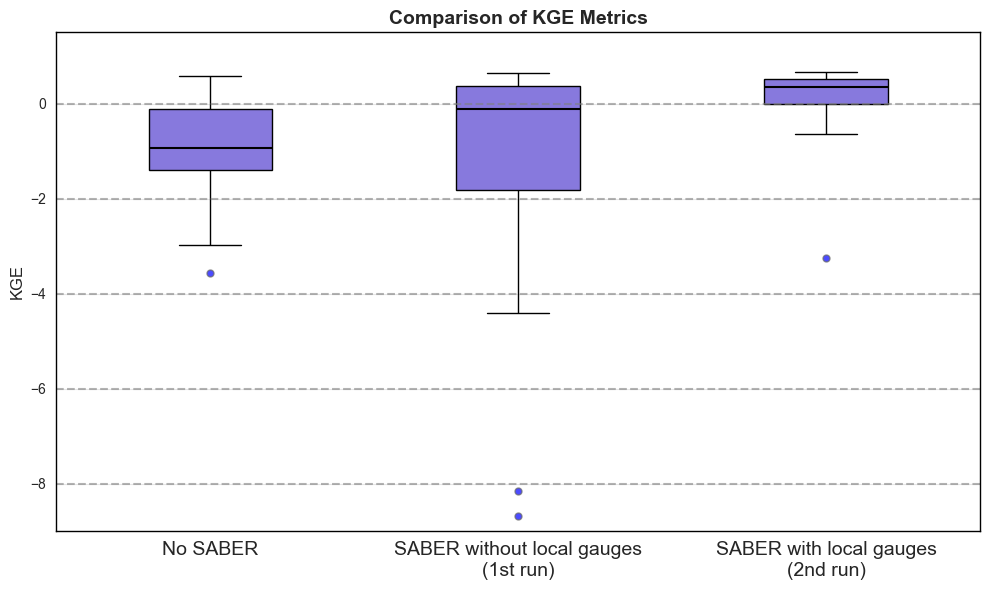

In [14]:
# Read the CSV file
df = pd.read_csv('/Users/yubinbaaniya/Documents/casestudy/all metrics combined file/casestudy_Togo.csv')

# Create a new dataframe with the updated category names
plot_data = pd.DataFrame({
    'Category': ['No SABER'] * len(df) + 
                ['SABER without local gauges\n(1st run)'] * len(df) + 
                ['SABER with local gauges\n(2nd run)'] * len(df),
    'KGE': list(df['kge_sim']) + list(df['kge_corr_1']) + list(df['kge_corr_2'])
})

# Set the figure style
plt.style.use('default')
sns.set_style("whitegrid", {'axes.grid': True, 'grid.color': '0.9'})

# Create the plot with darker border
fig, ax = plt.subplots(figsize=(10, 6))
# Add a darker border to the figure
plt.box(True)
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.0)

# Create the boxplot
box_plot = sns.boxplot(
    x='Category',
    y='KGE',
    data=plot_data,
    width=0.4,
    color='mediumslateblue',  # Lighter blue color that better matches the image
    showfliers=True,
    flierprops=dict(marker='o', markersize=5, markerfacecolor='blue', alpha=0.7),
    medianprops=dict(color='black', linewidth=1.5),
    boxprops=dict(edgecolor='black'),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black'),  
    ax=ax
)

# Add horizontal dashed lines at intervals of 2
y_min, y_max = plt.ylim()
y_min = np.floor(y_min / 2) * 2 
for y in np.arange(y_min, 2, 2):
    plt.axhline(y=y, color='gray', linestyle='--', alpha=0.6)

# Set y-axis limits similar to your example
plt.ylim(-9, 1.5)

# Set labels and title
plt.title('Comparison of KGE Metrics', fontsize=14, fontweight='bold')
plt.xlabel('', fontsize=12)  # Empty label with increased font size
plt.ylabel('KGE', fontsize=12)

# Increase the size of x-tick labels
plt.xticks(fontsize=14) 

# Adjust layout and display the plot
plt.tight_layout()
plt.savefig('/Users/yubinbaaniya/Documents/@paper/Plot/boxplot_kge_togo.png', dpi=1300, bbox_inches='tight')
plt.show()